In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Inputs à demander à l'utilisateur

In [54]:
# Get user inputs
S = float(input("Underlying Price (S): "))
K = float(input("Strike Price (K): "))
r = float(input("Risk-Free Rate (r): "))
q = float(input("Dividend Yield (q): "))
T = float(input("Time to Expiration (T): "))
sigma = float(input("Volatility (sigma): "))

Underlying Price (S): 100
Strike Price (K): 100
Risk-Free Rate (r): 0.0633
Dividend Yield (q): 0.1052
Time to Expiration (T): 3
Volatility (sigma): 0.40


# B-S pricer

In [55]:
def calculate_black_scholes(S, K, r, q, T, sigma):
    d1 = (math.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    Nd1 = 0.5 * (1 + math.erf(d1 / math.sqrt(2)))
    Nd2 = 0.5 * (1 + math.erf(d2 / math.sqrt(2)))

    call_price = S * math.exp(-q * T) * Nd1 - K * math.exp(-r * T) * Nd2
    put_price = K * math.exp(-r * T) * (1 - Nd2) - S * math.exp(-q * T) * (1 - Nd1)

    return call_price, put_price, d1, Nd1
    #return call_price, put_price, d1, Nd1

# Calculate option prices
call_price, put_price = calculate_black_scholes(S, K, r, q, T, sigma)
#call_price, put_price, d1 ,Nd1= calculate_black_scholes(S, K, r, q, T, sigma)

# results
print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")
#print(d1)
#print(Nd1)

Call Option Price: 16.533844849393116
Put Option Price: 26.302915020539704


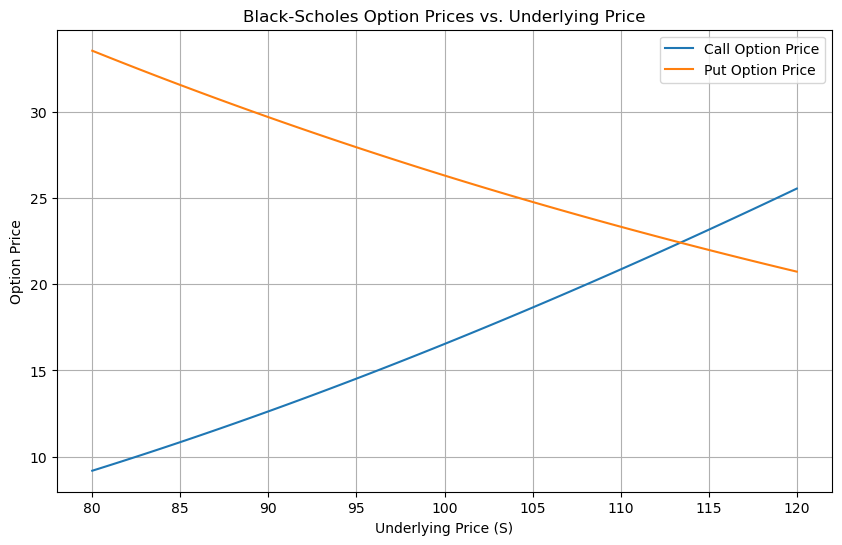

In [56]:
# Vary underlying price (S) from 80 to 120
S_values = np.linspace(80, 120, 100)
call_prices = []
put_prices = []

for S in S_values:
    call_price, put_price = calculate_black_scholes(S, K, r, q, T, sigma)
    call_prices.append(call_price)
    put_prices.append(put_price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S_values, call_prices, label='Call Option Price')
plt.plot(S_values, put_prices, label='Put Option Price')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs. Underlying Price')
plt.legend()
plt.grid(True)
plt.show()


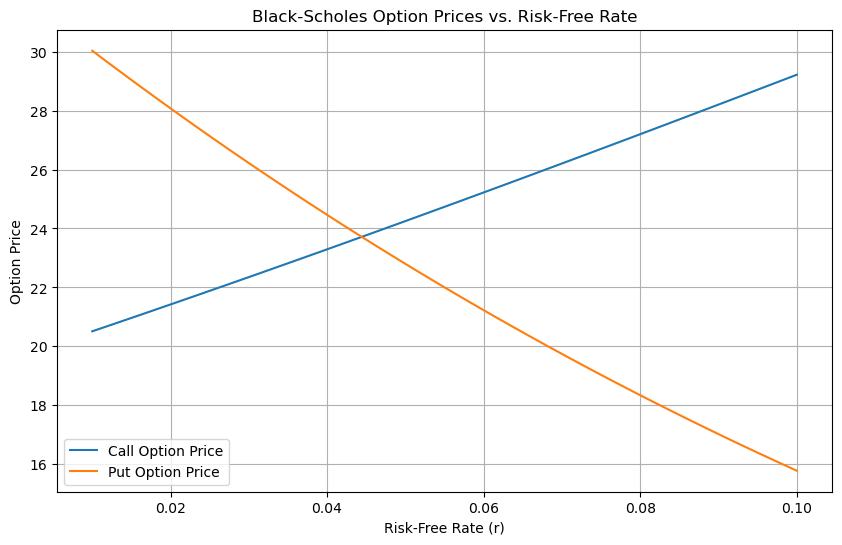

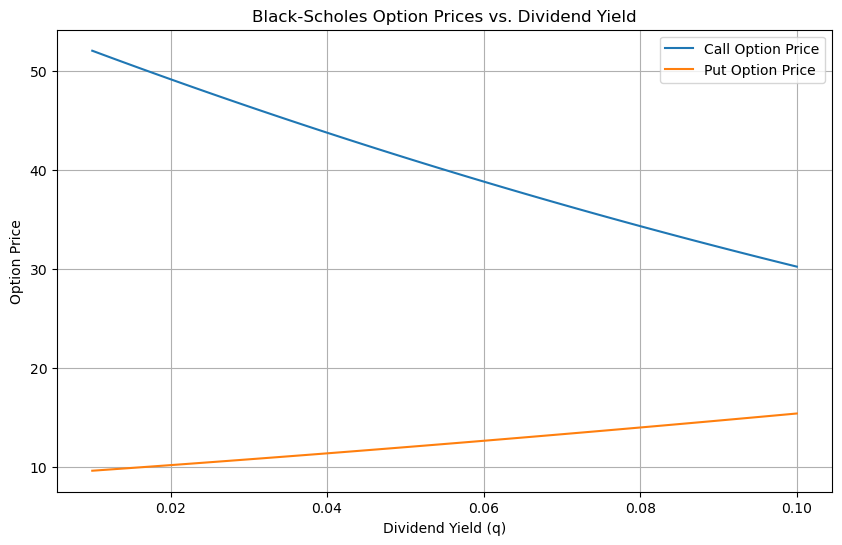

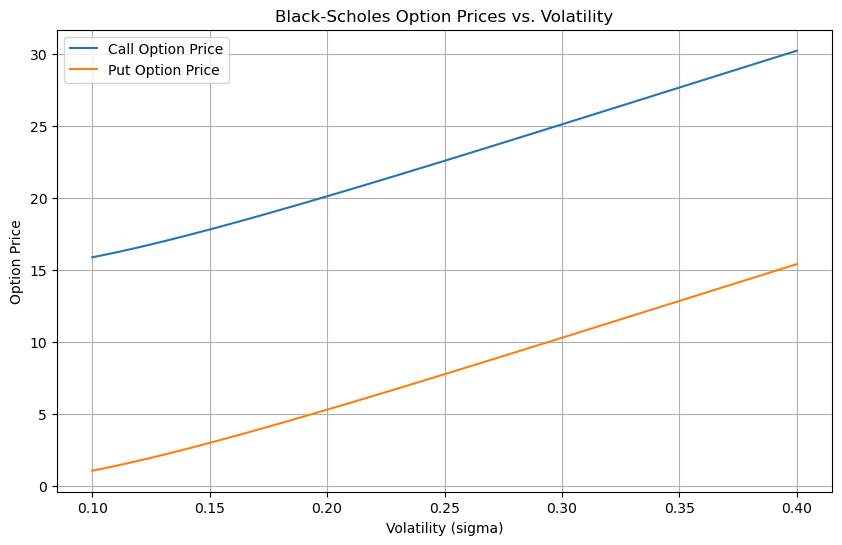

In [48]:
# Vary r  
r_values = np.linspace(0.01, 0.1, 100)
call_prices_r = []
put_prices_r = []

for r in r_values:
    call_price, put_price = calculate_black_scholes(S, K, r, q, T, sigma)
    call_prices_r.append(call_price)
    put_prices_r.append(put_price)

# Plot the results for risk-free rate (r)
plt.figure(figsize=(10, 6))
plt.plot(r_values, call_prices_r, label='Call Option Price')
plt.plot(r_values, put_prices_r, label='Put Option Price')
plt.xlabel('Risk-Free Rate (r)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs. Risk-Free Rate')
plt.legend()
plt.grid(True)
plt.show()

# Vary dividend yield (q) 
q_values = np.linspace(0.01, 0.1, 100)
call_prices_q = []
put_prices_q = []

for q in q_values:
    call_price, put_price = calculate_black_scholes(S, K, r, q, T, sigma)
    call_prices_q.append(call_price)
    put_prices_q.append(put_price)

# Plot the results for dividend yield (q)
plt.figure(figsize=(10, 6))
plt.plot(q_values, call_prices_q, label='Call Option Price')
plt.plot(q_values, put_prices_q, label='Put Option Price')
plt.xlabel('Dividend Yield (q)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs. Dividend Yield')
plt.legend()
plt.grid(True)
plt.show()

# Vary volatility (sigma) from 0.1 to 0.4
sigma_values = np.linspace(0.1, 0.4, 100)
call_prices_sigma = []
put_prices_sigma = []

for sigma in sigma_values:
    call_price, put_price = calculate_black_scholes(S, K, r, q, T, sigma)
    call_prices_sigma.append(call_price)
    put_prices_sigma.append(put_price)

# Plot the results for volatility (sigma)
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, call_prices_sigma, label='Call Option Price')
plt.plot(sigma_values, put_prices_sigma, label='Put Option Price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs. Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Monte-Carlo

In [49]:
def monte_carlo_option_pricing(S, K, r, T, sigma, option_type, num_simulations=100000):
    """
    Monte Carlo simulation for option pricing.

    Parameters:
    - S: Current stock price
    - K: Option strike price
    - r: Risk-free rate
    - T: Time to expiration (in years)
    - sigma: Volatility of the underlying stock
    - option_type: 'call' for call option, 'put' for put option
    - num_simulations: Number of Monte Carlo simulations

    Returns:
    - Option price
    """

    dt = T / 252  # assuming 252 trading days in a year
    S_values = np.zeros(num_simulations)
    
    
    
    for i in range(num_simulations):
        Z = np.random.normal(0, 1)
        S_T = S * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        S_values[i] = S_T

    if option_type == 'call':
        payoff = np.maximum(S_values - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - S_values, 0)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price


In [50]:
# Example usage:
# We can ask for new inputs here
S0 = float(input("Current stock price (S): "))
K0 = float(input("Option strike price (K): "))
r0 = float(input("Risk-free rate (r): "))
T0 = float(input("Time to expiration (T) in years: "))
sigma0 = float(input("Volatility (sigma): "))
option_type0 = input("Option type (call/put): ").lower()  
# Calculate option price using Monte Carlo simulation
option_price_mc = monte_carlo_option_pricing(S0, K0, r0, T0, sigma0, option_type0)

# Display results
print(f"{option_type0.capitalize()} Option Price (Monte Carlo): {option_price_mc}")

Current stock price (S): 100
Option strike price (K): 100
Risk-free rate (r): 0.0633
Time to expiration (T) in years: 3
Volatility (sigma): 0.4
Option type (call/put): call
Call Option Price (Monte Carlo): 1.4691626135976579


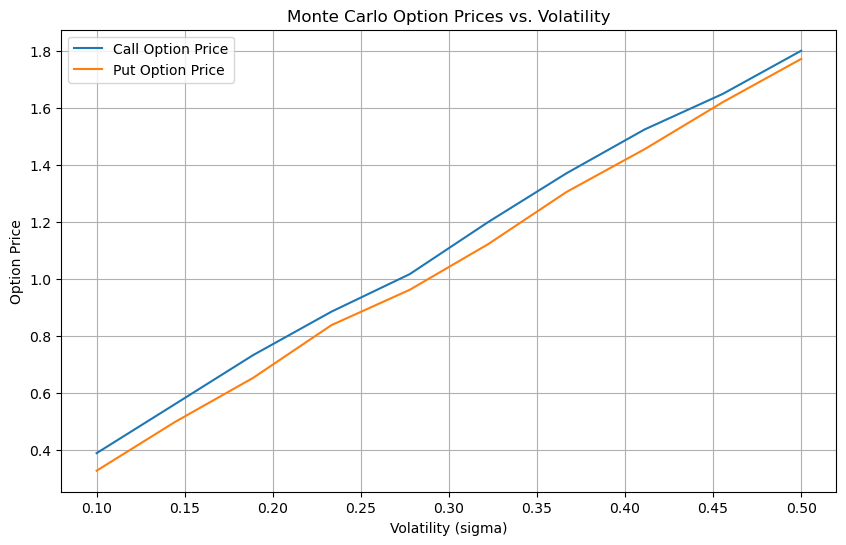

In [52]:
import matplotlib.pyplot as plt

# Variations de la volatilité
sigma_values = np.linspace(0.1, 0.5, 10)
option_prices_call = []
option_prices_put = []

# Calcul des prix des options pour chaque valeur de volatilité
for sigma in sigma_values:
    call_price = monte_carlo_option_pricing(S0, K0, r0, T0, sigma, 'call', num_simulations)
    put_price = monte_carlo_option_pricing(S0, K0, r0, T0, sigma, 'put', num_simulations)
    option_prices_call.append(call_price)
    option_prices_put.append(put_price)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, option_prices_call, label='Call Option Price')
plt.plot(sigma_values, option_prices_put, label='Put Option Price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option Price')
plt.title('Monte Carlo Option Prices vs. Volatility')
plt.legend()
plt.grid(True)
plt.show()
